<img src="banner.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import datasets, linear_model

### Short Pre-Processing

In [2]:
def cutdt(df):
    for idx, val in enumerate(df['confirmados']):
        if val!=0:
            where = idx
            break
    return df.iloc[where:]

In [3]:
dt = pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')

dt = cutdt(dt).reset_index()

dt = dt.fillna(0)

dt

,index,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,...,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria
0,5,02-03-2020,02-03-2020 00:00,2,2,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,03-03-2020,03-03-2020 16:00,4,2,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,7,04-03-2020,04-03-2020 17:00,6,3,1,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
3,8,05-03-2020,05-03-2020 17:00,9,5,1,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
4,9,06-03-2020,06-03-2020 17:00,13,8,1,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,238,21-10-2020,21-10-2020 00:00,106271,42921,8743,49459,2163,2307,329,...,168.0,273.0,835.0,659.0,1104.0,1125.0,0.0,0.0,40804.0,1085.0
234,239,22-10-2020,22-10-2020 00:00,109541,44875,9024,50395,2219,2335,332,...,168.0,276.0,838.0,665.0,1107.0,1138.0,0.0,0.0,42765.0,1165.0
235,240,23-10-2020,23-10-2020 00:00,112440,46391,9388,51313,2272,2373,334,...,171.0,277.0,849.0,678.0,1122.0,1154.0,0.0,0.0,44284.0,1220.0
236,241,24-10-2020,24-10-2020 00:00,116109,48603,9661,52340,2368,2427,338,...,171.0,278.0,855.0,685.0,1129.0,1168.0,0.0,0.0,46970.0,1234.0


In [4]:
dt.to_csv('data.csv')

### General Analysis

* [Evolution of Confirmed Cases](#conf-cases)
* [Evolution of Confirmed Cases per Region](#conf-cases-region)
* [% of Growth from Day Before](#growth-cases)
* [Evolution of Death Cases](#death-cases)
* [Confirmed Cases and Deaths per Age until Today](#today-picture)
* [Comparison of Cases and Deaths to the Past](#comparison)
* [Evolution of Hospitalized Cases](#hospital-cases)
* [Evolution of Active Cases](#ative-cases)


<a class="anchor" id="conf-cases"></a>
#### Evolution of Confirmed Cases

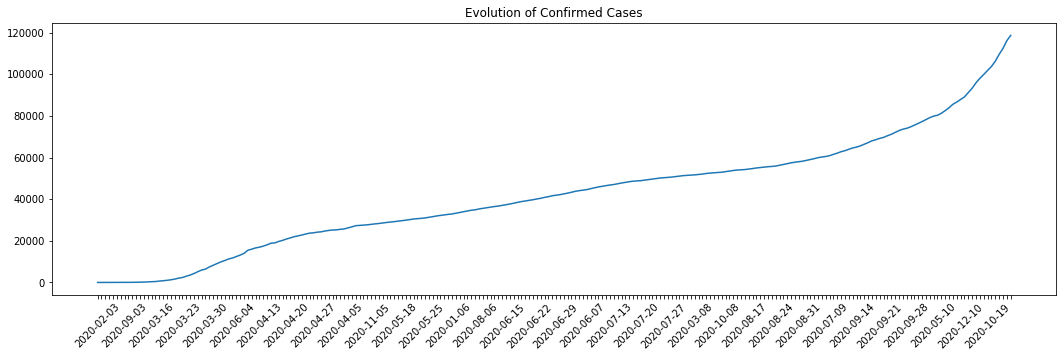

In [5]:
fig1, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['confirmados'])
plt.title('Evolution of Confirmed Cases')
plt.xticks(rotation=45)

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

###        
plt.show()

fig1.savefig('Daily Report/evolution_cases.png')

<a class="anchor" id="conf-cases-region"></a>
#### Evolution of Confirmed Cases per Region

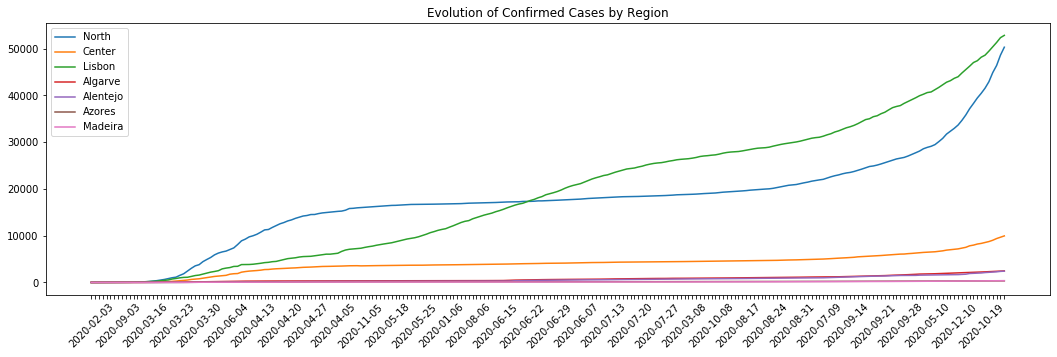

In [6]:
fig2, ax = plt.subplots(figsize=(18,5), sharex=True)
ax.plot(dt['data'], 'confirmados_arsnorte', data=dt, label='North')
ax.plot(dt['data'], 'confirmados_arscentro', data=dt,label="Center")
ax.plot(dt['data'], 'confirmados_arslvt', data=dt, label='Lisbon')
ax.plot(dt['data'], 'confirmados_arsalgarve', data=dt, label='Algarve')
ax.plot(dt['data'], 'confirmados_arsalentejo', data=dt, label='Alentejo')
ax.plot(dt['data'], 'confirmados_acores', data=dt, label='Azores')
ax.plot(dt['data'], 'confirmados_madeira', data=dt, label='Madeira')
plt.legend()

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
plt.title('Evolution of Confirmed Cases by Region')
plt.xticks(rotation=45)
plt.show()

fig2.savefig('Daily Report/evolution_cases_byRegion.png')

<a class="anchor" id="growth-cases"></a>
#### % of Growth from Day Before

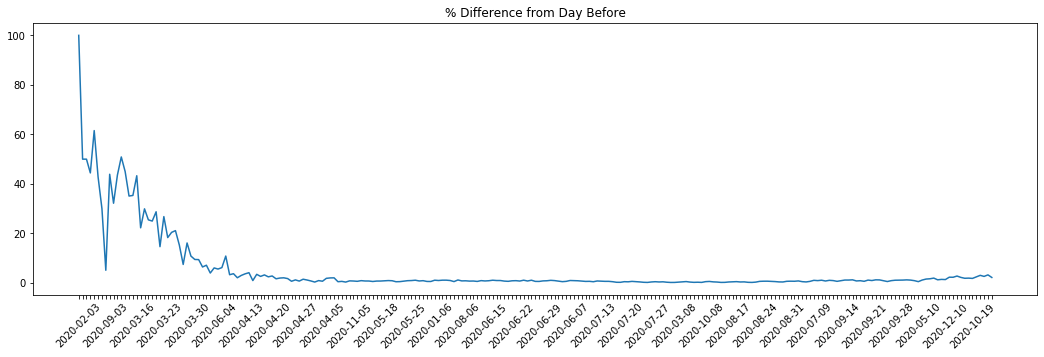

In [7]:
actuals = [x for x in dt['confirmados']]
actuals.reverse()

diff = []
for i in range(len(actuals)):
    if i != len(actuals)-1:
        difference = ((actuals[i]-actuals[i+1])/actuals[i+1])*100
        diff.append(difference)
    else:
        break
        
diff.reverse()

dates = [x for x in dt['data']][1:]

#########

fig3, ax = plt.subplots(figsize=(18,5), sharex=True)
ax.plot(dates, diff)

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
plt.xticks(rotation=45)
plt.title('% Difference from Day Before')

fig3.savefig('Daily Report/evolution_percentage.png')

<a class="anchor" id="death-cases"></a>
#### Evolution of Death Cases

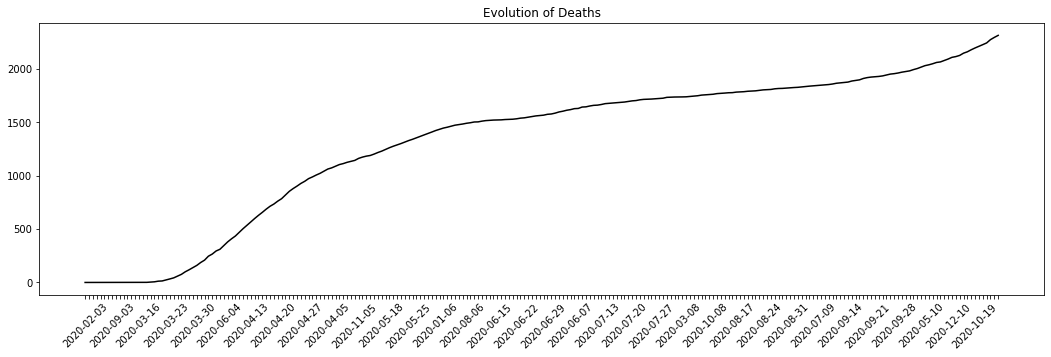

In [8]:
fig4, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['obitos'], color='black')

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
plt.title('Evolution of Deaths')        
plt.xticks(rotation=45)

plt.show()

fig4.savefig('Daily Report/evolution_deaths.png')

<a class="anchor" id="today-picture"></a>
#### Confirmed Cases and Deaths per Age Group Until Today

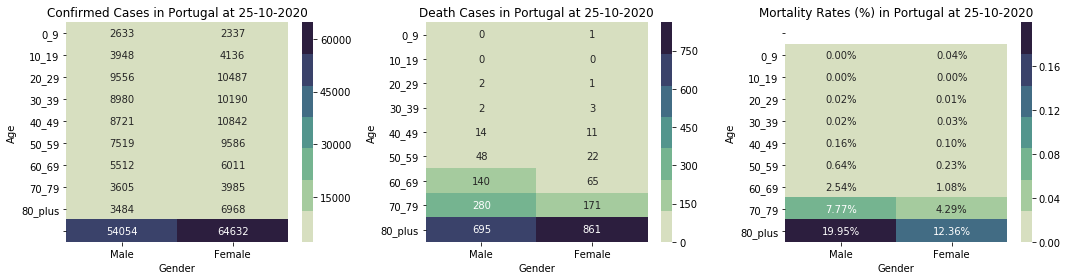

In [9]:
     ### CONFIRMED CASES

#define dictionaries
confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

#create dataframe with confirmed cases
confirmados = pd.DataFrame.from_dict(confirmados_m, orient='index', columns=['Male'])
confirmados['Female'] = pd.Series(confirmados_f, name='Female')

      ### DEATH CASES

#define dictionaries
obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

#create dataframes with death cases
obitos = pd.DataFrame.from_dict(obitos_m, orient='index', columns=['Male'])
obitos['Female'] = pd.Series(obitos_f, name='Female')


    ### DEATH RATE
    
mortalidade = round(obitos/confirmados,4)
    
    ### PLOT HEATMAPS

fig5, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

sns.heatmap(confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax1, fmt='g')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
ax1.set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
ax1.set_xlabel('Gender')
ax1.set_ylabel('Age')

sns.heatmap(obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax2, fmt='g')
bottom, top = ax2.get_ylim()
ax2.set_ylim(bottom + 0.5, top - 0.5)
ax2.set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
ax2.set_xlabel('Gender')
ax2.set_ylabel('Age')

sns.heatmap(mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=ax3, fmt='.2%')
bottom, top = ax3.get_ylim()
ax3.set_ylim(bottom + 0.5, top - 0.5)
ax3.set_title('Mortality Rates (%) in Portugal at ' + str(dt.iloc[-1]['data']))
ax3.set_xlabel('Gender')
ax3.set_ylabel('Age')

plt.tight_layout()

fig5.savefig('Daily Report/heatmaps_confirmed_death.png')

<a class="anchor" id="comparison"></a>
#### Comparison of Cases and Deaths to the Past

In [10]:
def compare_day_with_today(day):

            ### CONFIRMED CASES

    #define dictionaries for day
    day_confirmados_m = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    day_confirmados_f = {col[:-2][12:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for day
    day_confirmados = pd.DataFrame.from_dict(day_confirmados_m, orient='index', columns=['Male'])
    day_confirmados['Female'] = pd.Series(day_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for day
    day_obitos_m = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    day_obitos_f = {col[:-2][7:]:int(dt[day:day+1][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for day
    day_obitos = pd.DataFrame.from_dict(day_obitos_m, orient='index', columns=['Male'])
    day_obitos['Female'] = pd.Series(day_obitos_f, name='Female')
    
        ### MORTALITY RATE
        
    day_mortalidade = round(day_obitos/day_confirmados,4)
    
        ### CONFIRMED CASES

    #define dictionaries for today
    today_confirmados_m = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='m'][:-1]}
    today_confirmados_f = {col[:-2][12:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:11]=='confirmados' and x[-1:]=='f'][:-1]}

    #create dataframe with confirmed cases for today
    today_confirmados = pd.DataFrame.from_dict(today_confirmados_m, orient='index', columns=['Male'])
    today_confirmados['Female'] = pd.Series(today_confirmados_f, name='Female')

          ### DEATH CASES

    #define dictionaries for today
    today_obitos_m = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='m'][:-1]}
    today_obitos_f = {col[:-2][7:]:int(dt[-1:][col]) for col in [x for x in dt.columns if x[:6]=='obitos' and x[-1:]=='f'][:-1]}

    #create dataframes with death cases for today
    today_obitos = pd.DataFrame.from_dict(today_obitos_m, orient='index', columns=['Male'])
    today_obitos['Female'] = pd.Series(today_obitos_f, name='Female')
    
         ### MORTALITY RATE
        
    today_mortalidade = round(today_obitos/today_confirmados,4)
    
        ### PLOT HEATMAPS

    fig6, axs = plt.subplots(3,2, figsize=(15,15))

    sns.heatmap(day_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,0], fmt='g')
    bottom, top = axs[0,0].get_ylim()
    axs[0,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,0].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[day]['data']))
    axs[0,0].set_xlabel('Gender')
    axs[0,0].set_ylabel('Age')
    axs[0,0].set_yticklabels(axs[0,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_confirmados, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[0,1], fmt='g')
    bottom, top = axs[0,1].get_ylim()
    axs[0,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[0,1].set_title('Confirmed Cases in Portugal at ' + str(dt.iloc[-1]['data']))
    axs[0,1].set_xlabel('Gender')
    axs[0,1].set_ylabel('Age')
    axs[0,1].set_yticklabels(axs[0,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(day_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,0], fmt='g')
    bottom, top = axs[1,0].get_ylim()
    axs[1,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,0].set_title('Death Cases in Portugal at '+ str(dt.iloc[day]['data']))
    axs[1,0].set_xlabel('Gender')
    axs[1,0].set_ylabel('Age')
    axs[1,0].set_yticklabels(axs[1,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_obitos, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[1,1], fmt='g')
    bottom, top = axs[1,1].get_ylim()
    axs[1,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[1,1].set_title('Death Cases in Portugal at '+ str(dt.iloc[-1]['data']))
    axs[1,1].set_xlabel('Gender')
    axs[1,1].set_ylabel('Age')
    axs[1,1].set_yticklabels(axs[1,1].get_yticklabels(), rotation=0, horizontalalignment='right')
    
    sns.heatmap(day_mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[2,0], fmt='.2%')
    bottom, top = axs[2,0].get_ylim()
    axs[2,0].set_ylim(bottom + 0.5, top - 0.5)
    axs[2,0].set_title('Mortality Rate in Portugal at '+ str(dt.iloc[day]['data']))
    axs[2,0].set_xlabel('Gender')
    axs[2,0].set_ylabel('Age')
    axs[2,0].set_yticklabels(axs[2,0].get_yticklabels(), rotation=0, horizontalalignment='right')

    sns.heatmap(today_mortalidade, annot=True, cmap=sns.cubehelix_palette(7,start=.5, rot=-.75), ax=axs[2,1], fmt='.2%')
    bottom, top = axs[2,1].get_ylim()
    axs[2,1].set_ylim(bottom + 0.5, top - 0.5)
    axs[2,1].set_title('Mortality Rate in Portugal at '+ str(dt.iloc[-1]['data']))
    axs[2,1].set_xlabel('Gender')
    axs[2,1].set_ylabel('Age')
    axs[2,1].set_yticklabels(axs[2,1].get_yticklabels(), rotation=0, horizontalalignment='right')

    plt.tight_layout()

    fig6.savefig('Daily Report/comparison_confirmed_death.png')

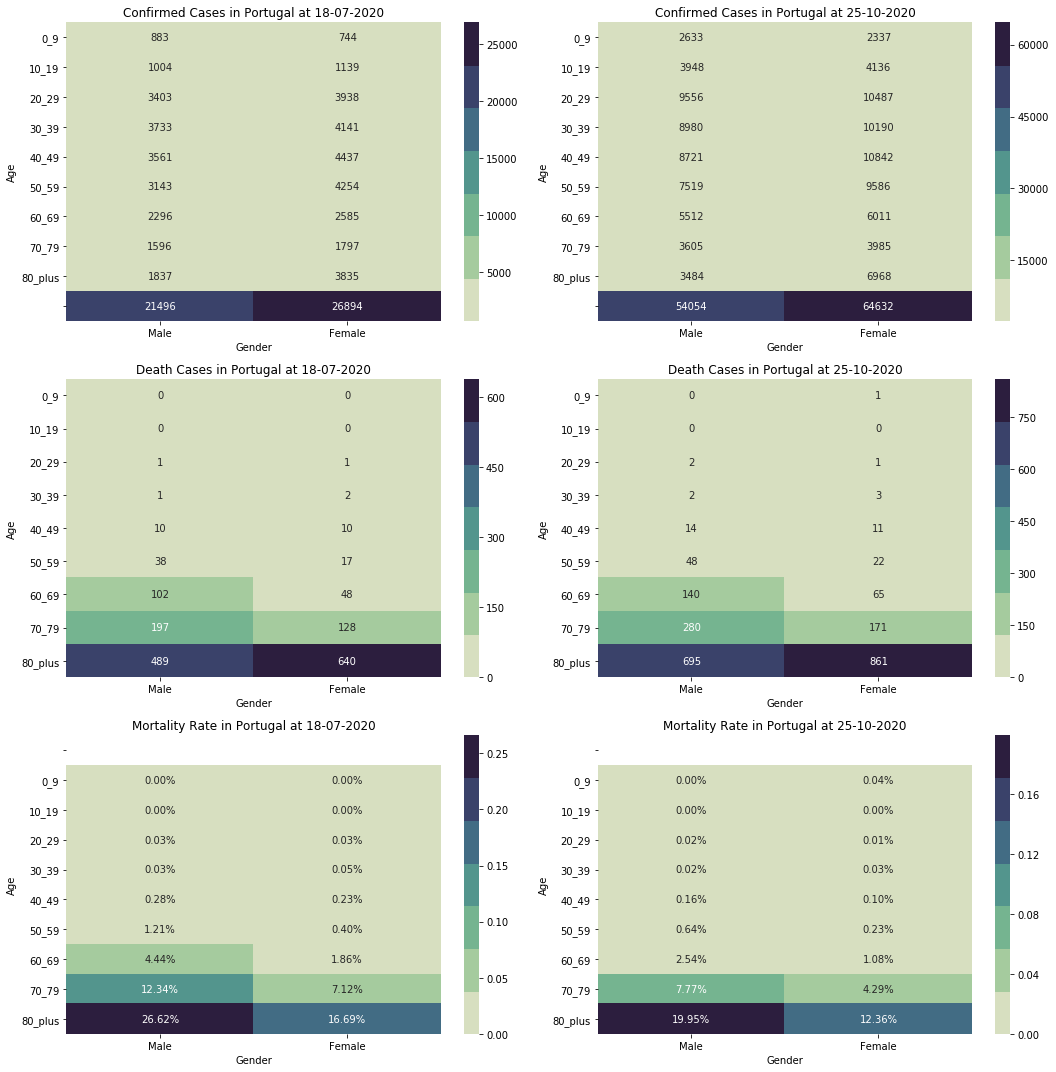

In [11]:
compare_day_with_today(len(dt)-100)

<a class="anchor" id="hospital-cases"></a>
#### Evolution of Hospitalized Cases

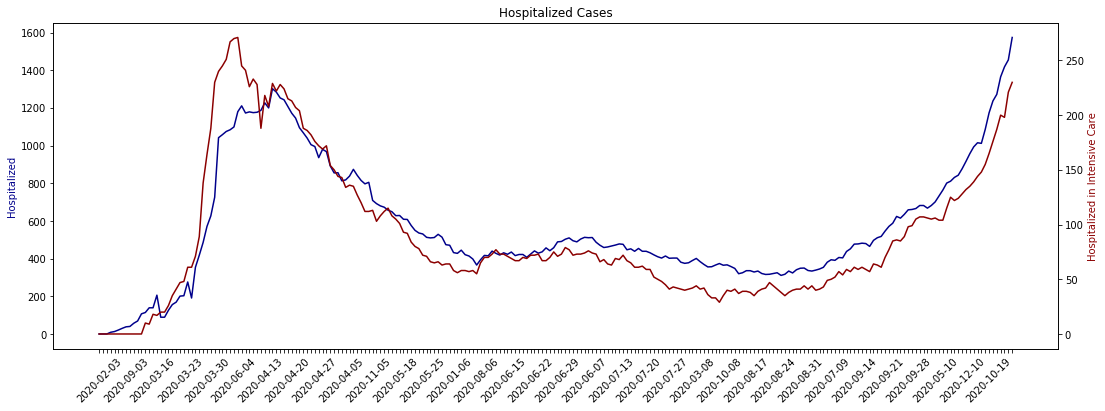

In [12]:
fig7, ax1 = plt.subplots(figsize=(18,6))

ax1.set_title('Hospitalized Cases')
ax1.set_ylabel('Hospitalized', color='DarkBlue')
ax1.plot(dt['data'], dt['internados'], color='DarkBlue')

ax2 = ax1.twinx() 
ax2.set_ylabel('Hospitalized in Intensive Care', color='DarkRed')
ax2.plot(dt['data'], dt['internados_uci'], color='DarkRed')

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax1.xaxis.get_ticklabels()[::spacing]
for label in ax1.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)
        
plt.show()

fig7.savefig('Daily Report/hospitalized_cases.png')

<a class="anchor" id="ative-cases"></a>
#### Evolution of Active Cases

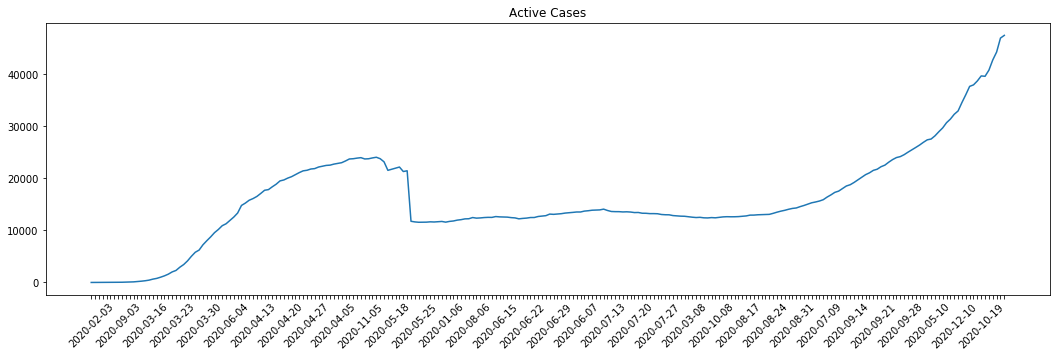

In [13]:
fig8, ax = plt.subplots(figsize=(18,5), sharex=True)

ax.plot(dt['data'],dt['ativos'])
plt.title('Active Cases')
plt.xticks(rotation=45)

###
ticklabels = pd.to_datetime(dt['data']).dt.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

spacing = 7
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)

###        
plt.show()

fig8.savefig('Daily Report/active_cases.png')